Univerzitet u Sarajevu

Elektrotehnički fakultet

#### **Dubinska analiza podataka**

# Laboratorijska vježba 6. - Preprocesiranje podataka

---

Izrada laboratorijske vježbe vrši se u ovom *Jupyter Notebook*-u. Isti je potrebno konvertovati u PDF dokument i predati na email adresu ekrupalija1@etf.unsa.ba.

Ime i prezime studenta, broj indeksa:

Haris Masovic, 1689/17993

Datum izrade izvještaja:

20.04.2021

**Za pomoć pri izradi izvještaja koristiti materijale za rad na predmetu *Predavanje 6-7*.**

In [1]:
import sys

!{sys.executable} -m pip install demoji bs4 textblob matplotlib wordcloud

----

### Zadatak 1. - Učitavanje *dataseta*

U okviru ovog zadatka potrebno je izvršiti učitavanje *dataseta* u varijablu nad kojom će se izvršiti svi koraci preprocesiranje i njegovo pripremanje za korištenje metoda mašinskog učenja.

**Zadatak:**
    
> Preuzeti *dataset* koji se nalazi na [sljedećem linku](https://drive.google.com/file/d/1jpLVnCHZB68DBKv_gDsUaLFDPefEWEz6/view?usp=sharing).
>
> Nakon toga izvršiti učitavanje svih redova podataka za kolonu <code>text</code> (odnosno posljednju kolonu atributa podataka) u neku varijablu.
>
> Ispisati prvi red podataka nakon učitavanja.

In [2]:
import pandas

df = pandas.read_csv("Full-Economic-News-DFE-839861.csv", usecols=["text"])

print(df.head(1))

                                                text
0  NEW YORK -- Yields on most certificates of dep...


----

### Zadatak 2. - Preprocesiranje teksta

U okviru ovog zadatka potrebno je izvršiti sve korake preprocesiranja teksta nad *datasetom* kako bi se tekstualni podaci što više prilagodili daljem korištenju kao ulaz za razne metode mašinskog učenja.

**Zadatak:**
    
> Definisati funkciju koja vrši uklanjanje svih *emoji* simbola, kao i *markup* elemenata iz stringa proslijeđenog kao parametar.
>
> Prikazati način rada ove funkcije tako što će se nad manuelno definisanim stringom koji sadrži *emoji* simbole i *markup* elemente izvršiti navedena funkcija i prikazati string prije i nakon uklanjanja ovih elemenata.

In [3]:
import demoji

from bs4 import BeautifulSoup


demoji.download_codes()

def remove_emojis_from_text(text):
    return demoji.replace(text, "")

def remove_markups_from_text(text):
    return BeautifulSoup(text).get_text()

text_with_emojis = "🔥Today is a good day!🔥";
html_string = "<!DOCTYPE html><html><body><p>This text is normal.</p><p><b>This text is bold.</b></p></body></html>"

print('')
print(*['Original:', text_with_emojis])
print(*['Nakon removanja emojia:', remove_emojis_from_text(text_with_emojis)])

print('')
print(*['Original:', html_string])
print(*['Nakon removanja emojia:', remove_markups_from_text(html_string)])

... OK (Got response in 0.50 seconds)
Writing emoji data to /Users/harismasovic/.demoji/codes.json ...
... OK

Original: 🔥Today is a good day!🔥
Nakon removanja emojia: Today is a good day!

Original: <!DOCTYPE html><html><body><p>This text is normal.</p><p><b>This text is bold.</b></p></body></html>
Nakon removanja emojia: This text is normal.This text is bold.


**Zadatak:**
    
> Definisati funkciju koja vrši uklanjanje svih URL-ova (linkova) iz stringa proslijeđenog kao parametar.
>
> Prikazati način rada ove funkcije tako što će se nad manuelno definisanim stringom koji sadrži barem 2 URL-a (linka) izvršiti navedena funkcija i prikazati string prije i nakon uklanjanja ovih elemenata.

In [4]:
import re

def remove_urls_from_text(text):
    return re.sub(r"http\S+", "", text)

text_with_urls = "Novosti su na https://www.klix.ba/, a moze i https://radiosarajevo.ba/."

print(*['Original:', text_with_urls])
print(*['Nakon removanja url-ova:', remove_urls_from_text(text_with_urls)])

Original: Novosti su na https://www.klix.ba/, a moze i https://radiosarajevo.ba/.
Nakon removanja url-ova: Novosti su na  a moze i 


**Zadatak:**
    
> Definisati funkciju koja vrši uklanjanje svih specijalnih (svih simbola osim slova i razmaka) iz stringa proslijeđenog kao parametar, a zatim vrši pretvaranje svih slova u mala.
>
> Prikazati način rada ove funkcije tako što će se nad manuelno definisanim stringom koji predstavlja rečenicu izvršiti navedena funkcija i prikazati string prije i nakon konverzije.
>
> Pri definisanju funkcije koristiti principe za uklanjanje apostrofa iz riječi, razdvajanje spojenih riječi i sl.

In [5]:
def remove_special_characters_and_lower_the_text(text):
    # removing apostrophes and replacing them with words
    # we can always add more substitions
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    
    # replace all non words with empty string
    text = re.sub(r"[^a-zA-Z ]", "", text)
    joined_words = re.findall("\w+[a-z][A-Z]\w+", text)
    
    # get only the words, upper or lower case
    for joined_word in joined_words:
        text = text.replace(joined_word, re.sub("(?<=[a-z])(?=[A-Z])", " ", joined_word))
    
    return text.lower()


text = "Hello it's me Adelle. How are you?"

processed_text = remove_special_characters_and_lower_the_text(text)

print(*['Original:', text])
print(*['Nakon removanja specijalnih karaktera i loweranja:', processed_text])

Original: Hello it's me Adelle. How are you?
Nakon removanja specijalnih karaktera i loweranja: hello it is me adelle how are you


**Zadatak:**
    
> Definisati funkciju koja vrši uklanjanje svih stop riječi iz stringa proslijeđenog kao parametar.
>
> Prikazati način rada ove funkcije tako što će se nad manuelno definisanim stringom koji sadrži mnogo stop riječi izvršiti navedena funkcija i prikazati string prije i nakon konverzije.

In [6]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words_from_text(text):
    tokens = word_tokenize(text)
    all_non_stop_words = []
    for token in tokens:
        if token not in stop_words:
            all_non_stop_words.append(token)
    
    # join the words
    return " ".join(all_non_stop_words)

text_with_stop_words = "hello it is me adelle, and it is me who you are looking for"

print(*['Original:', text_with_stop_words])
print(*['Nakon removanja stop words:', remove_stop_words_from_text(text_with_stop_words)])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harismasovic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harismasovic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/harismasovic/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Original: hello it is me adelle, and it is me who you are looking for
Nakon removanja stop words: hello adelle , looking


**Zadatak:**
    
> Definisati funkciju koja vrši ispravljanje pravopisa u stringu proslijeđenom kao parametar.
>
> Prikazati način rada ove funkcije tako što će se nad manuelno definisanim stringom koji sadrži mnogo pravopisnih grešaka izvršiti navedena funkcija i prikazati string prije i nakon konverzije.

In [7]:
from textblob import TextBlob

def fix_spelling_from_text(text):
    return TextBlob(text).correct()

text_spelled_wrong = "Helllo it's me adelle oince again"

print(*['Original:', text_spelled_wrong])
print(*['Nakon fix spellinga:', fix_spelling_from_text(text_spelled_wrong)])

Original: Helllo it's me adelle oince again
Nakon fix spellinga: Hello it's me adele once again


**Zadatak:**
    
> Definisati funkciju koja vrši svođenje riječi na osnovni oblik (stematizaciju) u stringu proslijeđenom kao parametar.
>
> Prikazati način rada ove funkcije tako što će se nad manuelno definisanim stringom koji sadrži mnogo kompleksnih riječi izvršiti navedena funkcija i prikazati string prije i nakon konverzije.

In [8]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

def stem_words_from_text(text):
    words = word_tokenize(text)
    stemmer = PorterStemmer()
    
    for word in words:
        text = text.replace(word, stemmer.stem(word))

    return text

text_to_stem = "The fishermen fished for fish"

print(*['Original:', text_to_stem])
print(*['Nakon stemminga:', stem_words_from_text(text_to_stem)])

Original: The fishermen fished for fish
Nakon stemminga: the fishermen fish for fish


**Zadatak:**
    
> Izvršiti sve prethodno definisane funkcije nad cijelim *datasetom* koji je učitan u prethodnom zadatku.
>
> Voditi računa o redoslijedu izvršavanja funkcija (najbolje je slijediti isti redoslijed izvršavanja kao pri definisanju funkcija) kako bi se preprocesiranje teksta ispravno izvršilo.
>
> Za 10 nasumično odabranih redova podataka prikazati sadržaj stringa prije i nakon vršenja svih koraka preprocesiranja.

In [9]:
import random

df['text'] = df['text'].apply(remove_emojis_from_text).apply(remove_markups_from_text).apply(remove_urls_from_text).apply(remove_special_characters_and_lower_the_text).apply(remove_stop_words_from_text).apply(stem_words_from_text)

all_actions_combined_text = df['text']

random_indices = [(int)(random.random() * df.last_valid_index()) for i in range(10)]

for i in random_indices:
    print(*['Before transforming:', df.iloc[i,:]['text']])
    print('')
    print(*['After transforming:', all_actions_combined_text.iloc[i]])
    print('')

Before transforming: new york citibank sever major bank trim prime lend rate much smaller cut gener expect bank industri borrow cost tumbl recent week lead mani analyst predict prime base fee corpor loan would slash even cut surprisingli small said william v sullivan jr senior vice presid dean witter reynold inc feder reserv system last week cut discount rate fee charg fed loan bank save institut half percentag point rate type bank borrows plung percentag point sinc late summer prime rate fallen percentag point high year philip braverman chief economist brigg schaedl co call slight reduct prime rate preemptiv strike design sway bank cut rate bank tri lock healthier profit margin cost lend rate contend feder regul pressur bank bolster capit base strengthen financi system encourag banker drag heel pass lower interest rate said mr sullivan dean witter

After transforming: new york citibank sever major bank trim prime lend rate much smaller cut gener expect bank industri borrow cost tumbl 

After transforming: linger bad news recess brought good news washington area food shopper never consum seen mani special promot cutrat deal offer local supermarket aggress compet increasingli costconsci shopperwild super deal doubl coupon warehous club half price special save club everyday total warehous price super special catch cours shopper need spend time learn weekli sp sak worth effort though even consum want continu go store gone past time will vest learn differ specialand travel store buy themth greater save take note point cost make trip gasolin time spent may outweigh save gain matter shop bargain decid buy gener rule help trim fat food budget

Before transforming: top offici japanes financ ministri met yeterday officis treasuri depart feder reserv fuel specul global market tokyo seek multin effort brake surg us dollar threaten prospect recoveri asia batter economi intern currenc market yeterday dollar fell yen earlier year high yen per dollar trader brace possibl officis us 

After transforming: orang counti calif billion hole declar bankruptci longtim treasur man directli respons fiasco quit alter year invest counti fund outperform market robert citron polici came cropper guess wrong interest rate turn greatli increas countis borrow cost decim valu deriv counti hold comiti resid blame fiasco lo angel time ask found percent blame citron percent name board supervisor percent dted wall street firm sold invest percent snit indiscrimin blame accus fjw peopl blame accord pollster mark baklassar bother includ result peopl word blame someon someth back june orang countis voter elect citron yet anoth term oppon iie john moorlach certifi public account financi planner fact made counti relianc deriv focu elect campaign talk deriv becam mego thing moorlach said time eye glam percent voter cast ballot elect return citron offic landslid word atxxit countis elig voter actual regist disapprov citron invest polici rest happi return get percent past year either yite keep of

----

### Zadatak 3. - Tokenizacija podataka

U okviru ovog zadatka potrebno je izvršiti segmentaciju i tokenizaciju prethodno pripremljenih tekstualnih podataka kako bi se podaci adekvatno pripremili za dalju analizu.

**Zadatak:**
    
> Definisati funkciju koja za string proslijeđen kao parametar vrši tokenizaciju, određuje sve jedinstvene riječi i broj njihovog ponavljanja. Kao rezultat se vraćaju dvije liste - lista jedinstvenih riječi i lista ponavljanja za svaku riječ iz prve liste.
>
> Prikazati način rada ove funkcije tako što će se za string koji sadrži barem 10 riječi sa različitim brojevima ponavljanja izvršiti navedena funkcija i prikazati njeni rezultati.

In [10]:
from nltk.tokenize import word_tokenize
from collections import Counter

def tokenize_and_get_unique_count_for_words(text):
    word_tokens = word_tokenize(text)
    counter = Counter(word_tokens)
    
    return (list(counter.keys()), list(counter.values()))

original_string = "Hello it is me Adelle, why hello there to me"

print(*['String:', original_string])

unique_words, word_counts = tokenize_and_get_unique_count_for_words(original_string)

print(*['Unique words:', unique_words])
print(*['Word counts:', word_counts])

String: Hello it is me Adelle, why hello there to me
Unique words: ['Hello', 'it', 'is', 'me', 'Adelle', ',', 'why', 'hello', 'there', 'to']
Word counts: [1, 1, 1, 2, 1, 1, 1, 1, 1, 1]


**Zadatak:**
    
> Definisati funkciju koja za listu riječi proslijeđenu kao parametar dodjeljuje POS tagove svim riječima. Kao rezultat se vraćaju dvije liste - lista jedinstvenih riječi i lista POS tagova za svaku riječ iz prve liste.
>
> Prikazati način rada ove funkcije tako što će se za prethodno određenu listu jedinstvenih riječi izvršiti navedena funkcija i prikazati njeni rezultati.

In [11]:
def give_pos_tags_to_text(text):
    tokens = nltk.word_tokenize(text)
    unique_words = []
    pos_tags = []
    
    for unique_word, pos_tag in nltk.pos_tag(tokens):
        unique_words.append(unique_word)
        pos_tags.append(pos_tag)

    return (unique_words, pos_tags)


text_for_pos_tags = "Hello it is me Adelle, why hello there to me"

unique_words, pos_tags = give_pos_tags_to_text(text_for_pos_tags)

print(*['Unique words:', unique_words])
print(*['POS tags:', pos_tags])

Unique words: ['Hello', 'it', 'is', 'me', 'Adelle', ',', 'why', 'hello', 'there', 'to', 'me']
POS tags: ['NNP', 'PRP', 'VBZ', 'PRP', 'NNP', ',', 'WRB', 'NN', 'RB', 'TO', 'PRP']


**Zadatak:**
    
> Definisati funkciju koja za listu stringova proslijeđenu kao parametar generiše jedinstven oblak riječi (spojiti stringove prije formiranja oblaka riječi).
>
> Prikazati način rada ove funkcije tako što će se za proizvoljno generisani string koji se sastoji od najmanje 10 rečenica izvršiti navedena funkcija i prikazati rezultni oblak riječi.

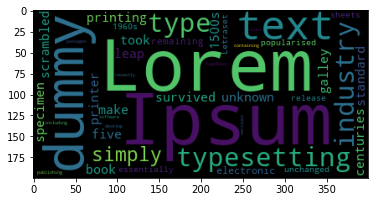

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_word_cloud_from_text(text):
    wordcloud = WordCloud()
    wc_from_text = wordcloud.generate(text)
    
    image = wc_from_text.to_image()
    plt.imshow(image) 
    

text_for_word_cloud = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry. 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book. 
It has survived not only five centuries, but also the leap into electronic typesetting, 
remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset 
sheets containing Lorem Ipsum passages, and more recently with desktop publishing software 
like Aldus PageMaker including versions of Lorem Ipsum.
"""

show_word_cloud_from_text(text_for_word_cloud)

**Zadatak:**
    
> Prikazati jedinstven oblak riječi za prvih 100 redova podataka iz *dataseta*.

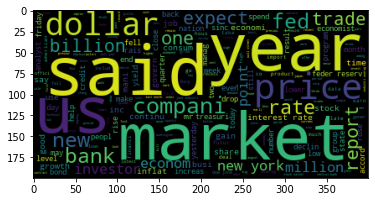

In [13]:
first_one_hundred = ""

for i in range(100):
    first_one_hundred += all_actions_combined_text.iloc[i] + " "

show_word_cloud_from_text(first_one_hundred)

**Zadatak:**
    
> Izvršiti sve prethodno definisane funkcije (osim funkcije za prikaz oblaka riječi) nad svim redovima podataka iz *dataseta*.
>
> Voditi računa o sljedećem:
>
> Konverzija se vrši na način da se za jedan red podataka iz *dataseta* sada formiraju tri nove kolone - jedna, koja sadrži jedinstvene riječi, druga, koja sadrži sve POS tagove i treća, koja sadrži broj ponavljanja za svaku jedinstvenu riječ, tj. POS tag.

In [14]:
df['unique_words'] = df['text'].apply(lambda x: tokenize_and_get_unique_count_for_words(x)[0])
df['unique_count'] = df['text'].apply(lambda x: tokenize_and_get_unique_count_for_words(x)[1])
df['pos_tags'] = df['text'].apply(lambda x: give_pos_tags_to_text(x)[1])

print(df)

                                                   text  \
0     new york yield certif deposit offer major bank...   
1     wall street journal onlin morn brief look day ...   
2     washington effort achiev bank reform senat neg...   
3     statist enorm cost employe drug abus well know...   
4     new york indecis mark dollar tone trader paus ...   
...                                                 ...   
7995  secretari commerc charl w sawyer said yesterda...   
7996  us stock inch last week overcom concern credit...   
7997  ben bernank clear key hurdl thursday confirm s...   
7998  white hous push contract mani feder function p...   
7999  new york april automobil stock put best show s...   

                                           unique_words  \
0     [new, york, yield, certif, deposit, offer, maj...   
1     [wall, street, journal, onlin, morn, brief, lo...   
2     [washington, effort, achiev, bank, reform, sen...   
3     [statist, enorm, cost, employe, drug, abus, we...

----

### Zadatak 4. - Spremanje *dataseta*

U okviru ovog zadatka potrebno je sačuvati preprocesirane podatke kako bi se omogućilo njihovo ponovno učitavanje za dalje korake analize i primjene metoda mašinskog učenja.

**Zadatak:**
    
> Sačuvati novu formu *dataseta* u novi *file* proizvoljnog naziva.
>
> U novi *file* treba se sačuvati samo prva kolona iz prvobitno učitanog *dataseta* (<code>unit_id</code>) koja predstavlja jedinstveni identifikator za svaki red podataka.
>
> Osim toga, potrebno je spremiti i prethodno kreirane kolone svih jedinstvenih riječi, POS tagova i broja ponavljanja.

In [15]:
unit_ids = []

for i in range(df.index.start, df.index.stop, df.index.step):
    unit_ids.append(i)
    
df['unit_id'] = unit_ids

df.to_csv("new_dataset.csv", columns=["unit_id", "pos_tags", "unique_words", "unique_count"], index = False)

print(df)

                                                   text  \
0     new york yield certif deposit offer major bank...   
1     wall street journal onlin morn brief look day ...   
2     washington effort achiev bank reform senat neg...   
3     statist enorm cost employe drug abus well know...   
4     new york indecis mark dollar tone trader paus ...   
...                                                 ...   
7995  secretari commerc charl w sawyer said yesterda...   
7996  us stock inch last week overcom concern credit...   
7997  ben bernank clear key hurdl thursday confirm s...   
7998  white hous push contract mani feder function p...   
7999  new york april automobil stock put best show s...   

                                           unique_words  \
0     [new, york, yield, certif, deposit, offer, maj...   
1     [wall, street, journal, onlin, morn, brief, lo...   
2     [washington, effort, achiev, bank, reform, sen...   
3     [statist, enorm, cost, employe, drug, abus, we...